# Tutorial A : Single Qubit Operations and Visualization of the Qubit State
&nbsp;

```{tip}
**Remember, to interact with the code in this Quantum Programming tutorial, go over to the 'rocket' icon on the top right of your page and select "Live Demo"**.&nbsp; From there, you'll be able to rerun the code cells individually and edit the code. 
```

## Objectives: 
- to explore single-qubit gate operations.
- to visualize a single-qubit state. 
&nbsp;

For this first tutorial, we will apply **quantum gates** to a singular qubit to observe their effects on the qubit's *state*. 

We will need to **build a quantum circuit**.
To do so, we are using the **Qiskit software development kit (SDK)** or simply *Qiskit* which allows us to do quantum circuit computation in the *Python* programming language and *access the backend of IBM simulators and quantum devices*. 

&nbsp;
&nbsp;


## 1. Importing Qiskit SDK into our Python editor 
&nbsp;

By running the following programming code, we will be able to use *Qiskit* for the rest of the tutorial.

In [1]:
import qiskit
from qiskit import *

&nbsp;
With *Qiskit* imported, we can now use its built-in functions to build our circuit. 


## 2. Creating a Quantum circuit with one qubit
&nbsp;

To create a circuit, we use the `QuantumCircuit()` function. In the parentheses `()`, we will insert the number of qubits that we wish to have. In this case, we desire only one so we put: 


In [2]:
myquantumcircuit= QuantumCircuit(1)

&nbsp;

Above, we've called our quantum circuit `myquantumcircuit` and given it a single qubit.&nbsp; *Now*, let's draw our circuit to see what it looks like by using the `draw()` function. 

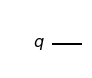

In [3]:
myquantumcircuit.draw(output='mpl')

*Great!* We have our first quantum circuit and it's that simple! &nbsp;

In order to make our circuit *useful*, however, we'll need to *add a quantum gate* and *see what the qubit's state is*. So let's do that now. 

&nbsp;


## 3. Applying a Quantum gate
&nbsp;

There are several **gates** that we can add to our circuit. *But* let's start with a simple one.
&nbsp;

For now we can apply an **X gate** which changes the state of our qubit to '1' if it is initially '0' *and* to '0' if it is initially '1'. 

```{note}
If you know about logic gates, it is analogous to the NOT gate. 
```
&nbsp;

The `x()` function applies an **X gate**.

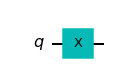

In [4]:
myquantumcircuit.x(0)

myquantumcircuit.draw(output='mpl')

We've drawn our circuit at once to see how it looks like. &nbsp; *And now* we see a box with an **'X'** added onto our qubit. &nbsp; 

The next step is to know what this gate does to the state of our qubit. For this we'll need to **measure** the circuit.   

&nbsp;

## 4. Measurement of a Quantum circuit
&nbsp;

Measurement is necessary to **extract information** from our system. &nbsp; *But remember*, when we measure a quantum system, it *collapses* to a *classical state* so that we may no longer be able to perform *quantum computation* on said system.
For this reason, we leave measurement **as the very last step to our quantum circuit**. 
&nbsp;


To **measure**, we will need to add a classical bit to "collect" the information from the quantum bit.<br>
When we apply `measure_all()` and then `draw()`, the final circuit shows an **analog scale** icon with an *arrow* point to a new double line which appears below our first qubit. 

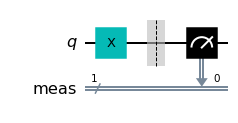

In [5]:
myquantumcircuit.measure_all()

myquantumcircuit.draw(output='mpl')

*However*, we still do not know what our measurement is. This is because **we haven't run our quantum circuit**!<br> All we have done until this point is to design a circuit *to be run* on a quantum computing device or a simulator...

So now we have to establish a connection to a *quantum computer* or *simulator* to get our results. 

&nbsp;

## 5. Connecting to an IBM Quantum device or simulator. 
&nbsp;

IBM allows us to access their quantum computers and quantum simulators for *free* in the cloud.<br> (To find out more about IBM quantum devices and simulators, click [here](https://www.ibm.com/quantum-computing/simulator/).) 
&nbsp; 

For now, we'll use the `'aer_simulator'` and we're calling it `sim` for short.

In [6]:
sim = Aer.get_backend('aer_simulator')

&nbsp; 

Once we've defined our `sim`, we can `execute()` the our quantum circuit.

In [7]:
job=execute(myquantumcircuit,sim,shots=1)

*But where's the results?* &nbsp; We *have definitely* run the circuit, but we need new functions to display the results...
&nbsp; 

## 6. Getting Results
&nbsp; 

We'll use the functions `result().get_counts()` and `print()` to extract the result from `job`. 

In [8]:
myresult=job.result().get_counts()
print(myresult)

{'1': 1}


<br>
Our result reads that we measured the value '1' once for our qubit.<br>

Let's try running the circuit more than once. To do this, we change the number of `shots` in our `execute()` function. We'll run the circuit 50 times with `shots=50`.

In [9]:
job=execute(myquantumcircuit,sim,shots=50)

myresult=job.result().get_counts()
print(myresult)

{'1': 50}


<br>
Now we see that we got the result '1' each time.<br>

This is expected as *Qiskit* initializes qubits in the state '0', unless we specify it to initialize in another state.
**Then**, we applied an **X gate** which **flipped our qubit** from the '0' state to the '1' state.

There's nothing *too interesting* right now, but let's find another way to visualize our results. 
&nbsp; 

## 7. Visualizing Results
&nbsp; 

We can plot **histograms** of our results, by using another module from *Qiskit*.&nbsp; We'll import the module now. 

In [10]:
from qiskit.visualization import *

The module `qiskit.visualization` is imported.&nbsp; Now we can plot the histogram. 

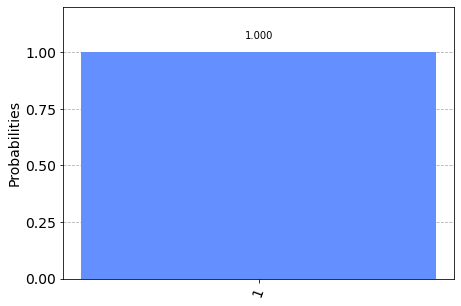

In [11]:
plot_histogram(myresult)

&nbsp; 
Great! We now have a histogram of our result. The histogram is clear that we got the state '1' with 100% probability. 

There are other cool ways to plot our results, but for that we'll need to use the backend of the `statevector_simulator` instead.<br> We'll do this in **Tutorial B** when we have a more interesting circuit. 

Let's try something else... Here's a cool way to see what happens to our qubit. 

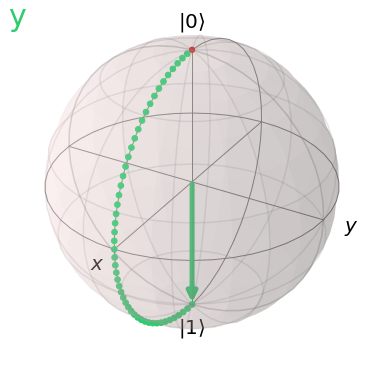

In [15]:
myquantumcircuitagain= QuantumCircuit(1)  # Recreating the same circuit with 1 qubit

myquantumcircuitagain.y(0)  # Recreating the circuit by adding an X gate

visualize_transition(myquantumcircuitagain, trace=True, saveas=None, fpg=50, spg=2)

*Cool!* That's the **Bloch sphere**. The state of our qubit went from $|0\rangle$ to $|1\rangle$ by rotating $180^\circ$. 
<br>
Let's look at some more interesting quantum gates. 
&nbsp; 

## 8. Playing with Superposition
&nbsp;

A gate that we **definitely** need to look at is the gate that creates a **superposition**. It's called a **Hadamard** gate and we use the function `h()` to apply it to a circuit.

Let's apply it now.

In [ ]:
superpositioncircuit=QuantumCircuit(1) # Make a circuit with 1 qubit

superpositioncircuit.h(0) # Apply Hadamard gate

superpositioncircuit.draw(output='mpl') # draw circuit

 Right, now we have a new circuit with a 'Hadamard' gate.&nbsp; Let's visualize what happens to the qubit. 

In [ ]:
visualize_transition(superpositioncircuit, trace=False, saveas=None, fpg=100, spg=2)

**Did you see that?**&nbsp;  The qubit did not go all the way to the state $|1\rangle$. It stopped midway between.<br> This is our superposition of $|0\rangle+|1\rangle$.&nbsp; It's in both $|0\rangle$ and $|1\rangle$ at the same time.
&nbsp; 

But what happens when we **measure** our quantum circuit... 

In [ ]:
superpositioncircuit.measure_all() # Do the measurement 

superpositioncircuit.draw(output='mpl') # Draw the circuit 

In [ ]:
superpositionjob=execute(superpositioncircuit, sim, shots=100) # Execute the circuit with 100 shots

superpositionresult=superpositionjob.result().get_counts() # Get the result

print(superpositionresult) # Print the result

When we measured our circuit, we got the $|0\rangle$ state **and** the $|1\rangle$ state.&nbsp; This is because when we measure a superposed state, the qubit "chooses" between one of the measurable states.<br> For our 100 executions of the circuit, we should get a fairly equal split *around 50-50* of the $|0\rangle$ and $|1\rangle$ states. 

```{tip}
Try rerunning the above code cell again and see if you get a *slightly* changed result.  
```
&nbsp; 

Plotting the histogram... 

In [ ]:
plot_histogram(superpositionresult)


**That's the end of Tutorial A!** In **Tutorial B**, we'll look at circuits with *more than one* qubit. 
&nbsp; 

***In the meantime...*** 

# **Try Your Own Code**

**We leave you this space to enter and play around with your own Programming code**. &nbsp; You may want to restart the kernel. 

In [ ]:
import qiskit 
from qiskit import *
from qiskit.visualization import *





